In [80]:
import tensorflow as tf
import tensorflow 
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.random.set_seed(42)
np.random.seed(42)

In [81]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [82]:
data=fetch_california_housing()

In [83]:
X,y=data.data,data.target

In [84]:
df = pd.DataFrame(X,columns=data.feature_names)
df['target']=y

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, random_state=42)


In [86]:
sts = StandardScaler()
x_train_scaled = sts.fit_transform(X_train)
x_test_scaled = sts.transform(X_test)
x_valid_scaled = sts.transform(X_valid)

In [87]:
(x_train_scaled.shape),(x_test_scaled.shape),(x_valid_scaled.shape)

((11610, 8), (5160, 8), (3870, 8))

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',input_shape=x_train_scaled.shape[1:]),
keras.layers.Dense(1)

])
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(1e-3))
history = model.fit(x_train_scaled,y_train,epochs=100,validation_data=(x_valid_scaled,y_valid))


Epoch 1/100


d:\neural_net\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8951 - val_loss: 0.8913
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7438 - val_loss: 0.6696
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6767 - val_loss: 0.6222
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6343 - val_loss: 0.5840
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5992 - val_loss: 0.5515
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5705 - val_loss: 0.5245
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.5469 - val_loss: 0.5028
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5277 - val_loss: 0.4859
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5120 - val_loss: 0.4728
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4991 - val_loss: 0.4626
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4883 - val_loss: 0.4547
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

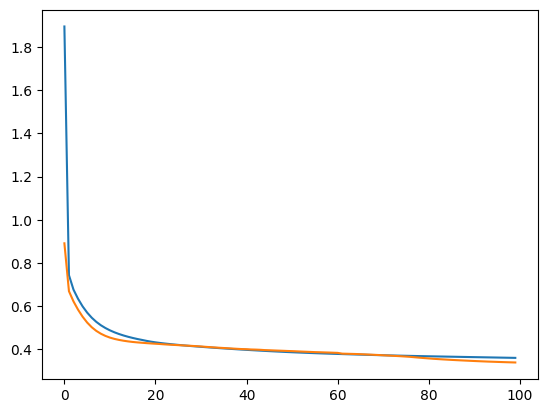

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
mse_test = model.evaluate(x_test_scaled,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.3585


In [93]:
model.predict(x_test_scaled[0])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(8,), dtype=float32). Expected shape (None, 8), but input has incompatible shape (8,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(8,), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>